# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

In [19]:
# откройте данные: ваш код здесь
df = pd.read_csv('data\spam_or_not_spam.csv', sep = ',')
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\User\AppData\Local\Temp\ipykernel_3084\4133299199.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('data\spam_or_not_spam.csv', sep = ',')


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [20]:
# рассчитайте частоты для классов : ваш код здесь

сlass = ['не спам','спам']                                          # Список для расшифровки
label_distrib = df.groupby('label').count()                         # группировка данных
label_distrib.index = label_distrib.index.map(lambda x: сlass[x])   # Заменяем категории классов на слова

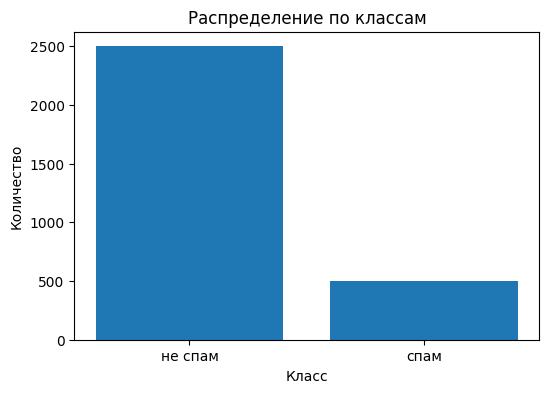

In [21]:
# Визуализируем распределение меток
сlass = {1:'спам', 0: 'не спам'}

plt.figure(figsize=(6, 4))
plt.bar(label_distrib.index.astype(str), label_distrib['email'])
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.title('Распределение по классам')
plt.show()

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [22]:
df_clean = df.copy()

In [23]:
#ваш код здесь

# Заменяем все несловесные символы (кроме букв и цифр) на пробел
df_clean['email'] = df_clean['email'].str.replace('\W+', ' ', regex=True)

# Заменяем множественные пробелы на один пробел и удаляем начальные и конечные пробелы
df_clean['email'] = df_clean['email'].str.replace('\s+', ' ', regex=True).str.strip()

<>:4: SyntaxWarning: invalid escape sequence '\W'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\W'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\User\AppData\Local\Temp\ipykernel_3084\2686548867.py:4: SyntaxWarning: invalid escape sequence '\W'
  df_clean['email'] = df_clean['email'].str.replace('\W+', ' ', regex=True)
C:\Users\User\AppData\Local\Temp\ipykernel_3084\2686548867.py:7: SyntaxWarning: invalid escape sequence '\s'
  df_clean['email'] = df_clean['email'].str.replace('\s+', ' ', regex=True).str.strip()


In [24]:
# Удаляем пропуски

df_clean = df_clean.dropna()

Переводим данные в векторный вид:

In [25]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_clean["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [10]:
#ваш код здесь
X.shape

(2999, 34116)

> Итого после векторизации данных, колчиство столбцов равно количеству уникальных слов в сообщениях

> Также удалилась одна строка после очитки данных от NaN значений

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [26]:
#ваш код здесь
y = df_clean["label"]

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [27]:
#ваш код здесь

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [28]:
#ваш код здесь

print(f'распределение тестовой выборки {round(y_test.mean(),2)}')
print(f'распределение тренировочной выборки {round(y_train.mean(),2)}')

распределение тестовой выборки 0.17
распределение тренировочной выборки 0.17


> Целевой признак распределён равномерно

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [ ]:
#ваш код здесь

clf = MultinomialNB(alpha=0.01)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [67]:
#ваш код здесь

print(f"Accuracy: {round(accuracy_score(y_test, y_test_pred),3)}")
print(f"Рrecision: {round(precision_score(y_test, y_test_pred),3)}")
print(f"f1_score: {round(f1_score(y_test, y_test_pred),3)}")

Accuracy: 0.987
Рrecision: 0.975
f1_score: 0.959


> Метрики высокие, значения близки к 1

Нарисуйте ROC-кривую:

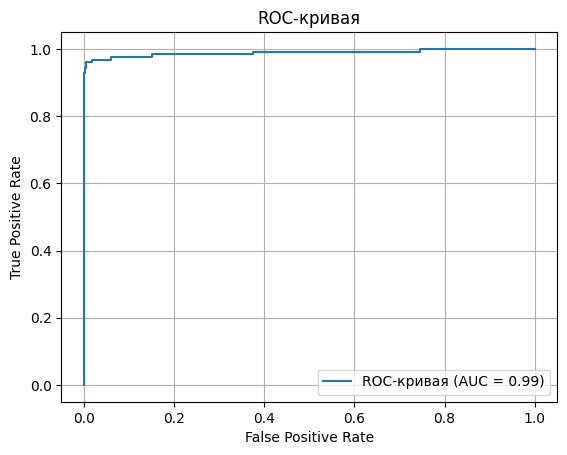

In [ ]:
#ваш код здесь

# Получение вероятностей для положительного класса
y_proba = clf.predict_proba(X_test)[:, 1]

# Вычисление координат ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure()
plt.plot(fpr, tpr, label='ROC-кривая (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [29]:
#ваш код здесь

alphas = [0.001, 0.01, 0.1, 1, 2, 5]
acc_scores = []
prec_scores = []
f1_scores = []

for alpha in alphas:
    clf = MultinomialNB(alpha=alpha)
    
    acc = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    prec = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro').mean()
    
    acc_scores.append(acc)
    prec_scores.append(prec)
    f1_scores.append(f1)

    print(f'alpha={alpha:.3F}')
    print(f'accuracy: {acc:.3F}')
    print(f'precision: {prec:.3F}')
    print(f'precision: {f1:.3F}')
    print('_____________________')

alpha=0.001
accuracy: 0.987
precision: 0.986
precision: 0.975
_____________________
alpha=0.010
accuracy: 0.991
precision: 0.990
precision: 0.983
_____________________
alpha=0.100
accuracy: 0.991
precision: 0.985
precision: 0.984
_____________________
alpha=1.000
accuracy: 0.993
precision: 0.990
precision: 0.987
_____________________
alpha=2.000
accuracy: 0.985
precision: 0.991
precision: 0.972
_____________________
alpha=5.000
accuracy: 0.935
precision: 0.964
precision: 0.858
_____________________


> Наилучашая метрика достигается при **alpha = 1**, при значениях **aplpha > 1** метрики падают